In [1]:
library(magrittr)
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(GenomicRanges))
library(rtracklayer)
library(ggplot2)

Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’


In [2]:
options(repr.plot.width=6, repr.plot.height=4)
options(jupyter.plot_mimetypes = setdiff(getOption('jupyter.plot_mimetypes'), 'image/svg+xml'))

In [3]:
target_regions_file <- "../input/target_regions.bed"

sidron_bam <- "../bam/sidron_ontarget.bam"
exome_sidron_bam <- "../bam/exome_sidron_ontarget.bam"
den8_bam <- "../bam/den8_ontarget.bam"
den8_deam_bam <- "../bam/deam_den8_ontarget.bam"

## Characteristics of the capture design

In [26]:
(target_regions <- import.bed(target_regions_file))

GRanges object with 1251 ranges and 0 metadata columns:
         seqnames               ranges strand
            <Rle>            <IRanges>  <Rle>
     [1]        Y   [2654558, 2655025]      *
     [2]        Y   [2655283, 2656016]      *
     [3]        Y   [2657115, 2657233]      *
     [4]        Y   [2658211, 2658329]      *
     [5]        Y   [2660554, 2661015]      *
     ...      ...                  ...    ...
  [1247]        Y [24484138, 24484256]      *
  [1248]        Y [28622412, 28622530]      *
  [1249]        Y [28733041, 28733159]      *
  [1250]        Y [28771055, 28771173]      *
  [1251]        Y [28788582, 28788700]      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### Size distribution of target regions (all numbers in bp)

Total size:

In [5]:
sum(width(target_regions))

[1] 573657

In [6]:
summary(width(target_regions))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   119.0   151.0   458.6   820.0  3899.0 

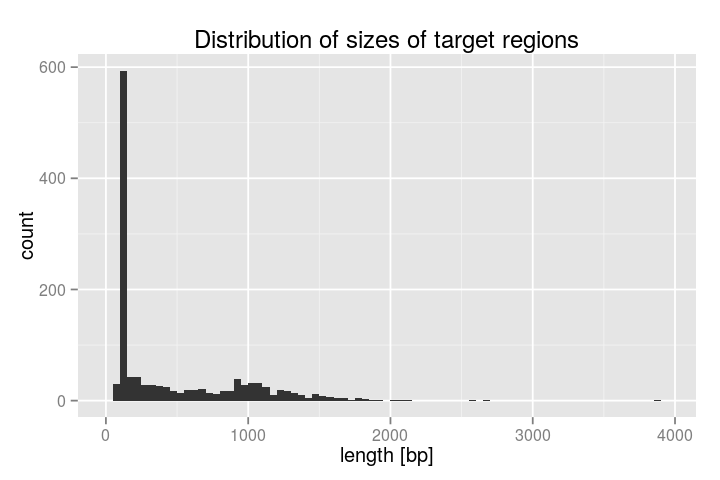

In [7]:
qplot(width(target_regions), binwidth=50, xlab="length [bp]", main="Distribution of sizes of target regions")

In [8]:
get_coverage_info <- function(target_bed_file, bam_file) { 
    paste("bedtools coverage -a", target_bed_file, "-b", bam_file, "-d") %>%
        pipe %>%
        read.table(col.names=c("chr", "start", "end", "pos", "cvg")) %>%
            makeGRangesFromDataFrame(starts.in.df.are.0based=TRUE, keep.extra.columns=TRUE)
}

# El Sidron 570kb capture

In [9]:
sidron_captured_sites <- get_coverage_info(target_regions_file, sidron_bam)

### Summary of coverage per site in target regions

In [10]:
summary(sidron_captured_sites$cvg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   8.000   8.426  12.000  53.000 

### What is the number of bases covered?

In [11]:
length(sidron_captured_sites[sidron_captured_sites$cvg > 0])

[1] 549351

### What fraction of target regions is covered? (in %)

In [12]:
mean(sidron_captured_sites$cvg > 0) * 100

[1] 95.76297

### Coverage plot

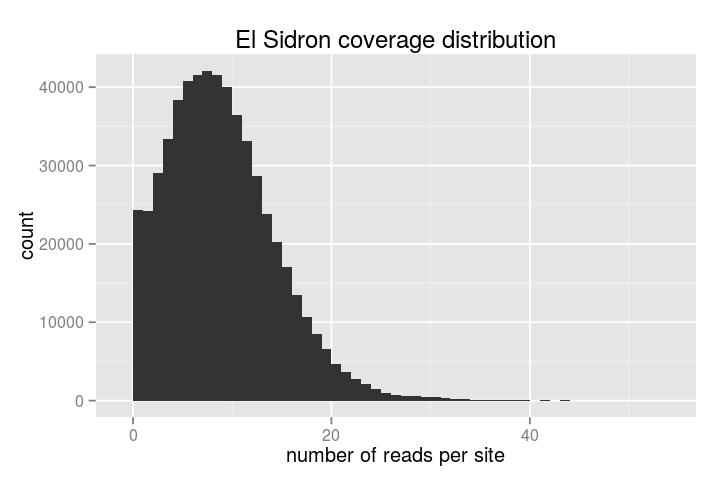

In [13]:
qplot(sidron_captured_sites$cvg, binwidth=1, xlab="number of reads per site", main="El Sidron coverage distribution")

# Denisova 8

In [14]:
den8_captured_sites <- get_coverage_info(target_regions_file, den8_bam)

### Summary of coverage per site in target regions

In [15]:
summary(den8_captured_sites$cvg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.04115 0.00000 3.00000 

### What is the number of bases covered?

In [16]:
length(den8_captured_sites[den8_captured_sites$cvg > 0])

[1] 22376

### What fraction of target regions is covered? (in %)

In [17]:
mean(den8_captured_sites$cvg > 0) * 100

[1] 3.900589

### Coverage plot

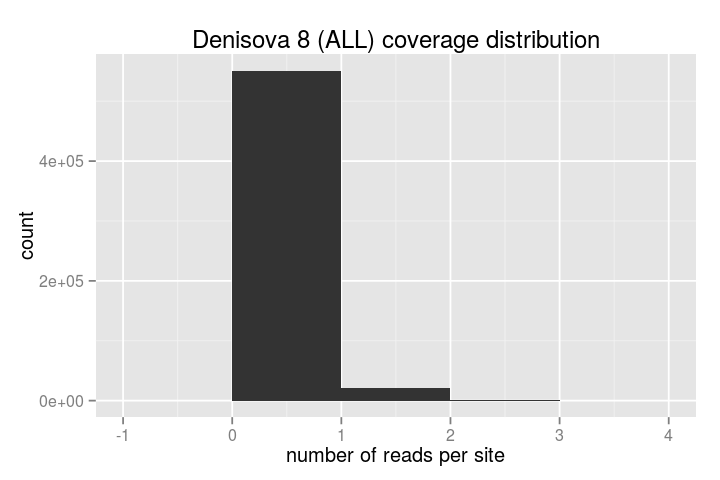

In [18]:
qplot(den8_captured_sites$cvg, binwidth=1, xlab="number of reads per site", main="Denisova 8 (ALL) coverage distribution")

# Denisova 8 deam

In [19]:
den8_deam_captured_sites <- get_coverage_info(target_regions_file, den8_deam_bam)

### Summary of coverage per site in target regions

In [20]:
summary(den8_deam_captured_sites$cvg)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.007369 0.000000 1.000000 

### What is the number of bases covered?

In [21]:
length(den8_deam_captured_sites[den8_deam_captured_sites$cvg > 0])

[1] 4227

### What fraction of target regions is covered? (in %)

In [22]:
mean(den8_deam_captured_sites$cvg > 0) * 100

[1] 0.7368515

### Coverage plot

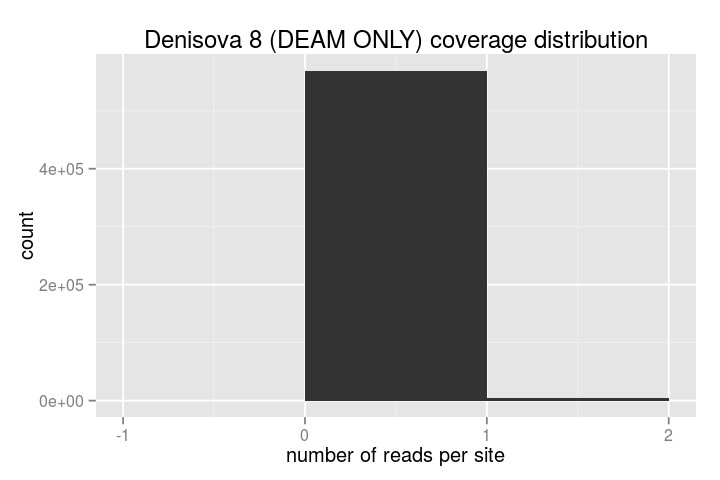

In [23]:
qplot(den8_deam_captured_sites$cvg, binwidth=1, xlab="number of reads per site", main="Denisova 8 (DEAM ONLY) coverage distribution")

# El Sidron exome

In [24]:
exome_sidron_captured_sites <- get_coverage_info(target_regions_file, exome_sidron_bam)

### Summary of coverage per site in target regions

In [25]:
summary(exome_sidron_captured_sites$cvg)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.0000   0.2158   0.0000 158.0000 

### What is the number of bases covered?

In [26]:
length(sidron_captured_sites[exome_sidron_captured_sites$cvg > 0])

[1] 20746

### What fraction of target regions is covered? (in %)

In [27]:
mean(exome_sidron_captured_sites$cvg > 0) * 100

[1] 3.616447

### Coverage plot

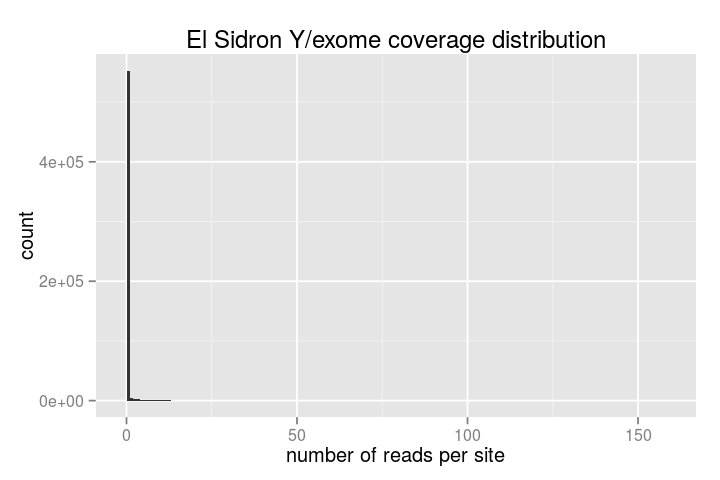

In [30]:
qplot(exome_sidron_captured_sites$cvg, binwidth=1, xlab="number of reads per site", main="El Sidron Y/exome coverage distribution")

### Coverage plot for sites with > 0 coverage

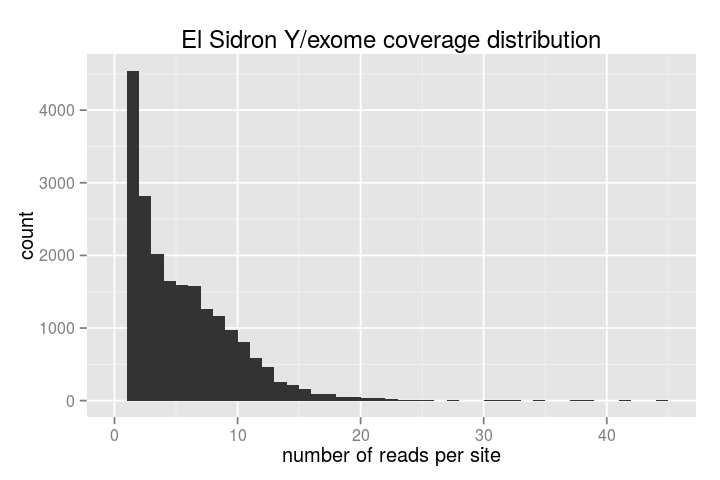

In [33]:
qplot(exome_sidron_captured_sites$cvg[exome_sidron_captured_sites$cvg > 0], binwidth=1, xlim=c(0, 45),
      xlab="number of reads per site", main="El Sidron Y/exome coverage distribution")

# Y capture regions from the Lippold et al. 2014 paper

paper: http://investigativegenetics.biomedcentral.com/articles/10.1186/2041-2223-5-13

XLSX file with coordinates of regions: http://static-content.springer.com/esm/art%3A10.1186%2F2041-2223-5-13/MediaObjects/13323_2014_104_MOESM2_ESM.xlsx

In [7]:
library(xlsx)

Loading required package: rJava
Loading required package: xlsxjars


In [16]:
(basti_targets <-
    read.xlsx("../13323_2014_104_MOESM2_ESM.xlsx", sheetIndex=1, startRow=6, colClasses=rep("integer", 3), header=FALSE) %>%
    dplyr::select(start=X1, end=X2) %>%
    mutate(chr="Y") %>%
    select(chr, start, end) %>%
    makeGRangesFromDataFrame(starts.in.df.are.0based=TRUE))

GRanges object with 655 ranges and 0 metadata columns:
        seqnames               ranges strand
           <Rle>            <IRanges>  <Rle>
    [1]        Y   [2654558, 2655025]      *
    [2]        Y   [2655283, 2656016]      *
    [3]        Y   [2660554, 2661015]      *
    [4]        Y   [2661213, 2661456]      *
    [5]        Y   [2661759, 2662110]      *
    ...      ...                  ...    ...
  [651]        Y [23634463, 23634818]      *
  [652]        Y [23766774, 23766892]      *
  [653]        Y [23767155, 23767229]      *
  [654]        Y [23767320, 23767502]      *
  [655]        Y [24441937, 24443041]      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [17]:
sum(width(basti_targets))

[1] 501108

### What is the length of shared regions between El Sidron Y capture array and Basti's capture?

In [18]:
shared_regions <- GenomicRanges::intersect(target_regions, basti_targets)

In [19]:
sum(width(shared_regions))

[1] 501108

In [20]:
sum(width(shared_regions)) / sum(width(target_regions)) * 100

[1] 87.35324

In [21]:
sum(width(shared_regions)) / sum(width(basti_targets)) * 100

[1] 100

# Basti's original capture design?

In [31]:
basti_targets2 <- import.bed("/mnt/genotyping/sendru/basti_design.bed")

In [32]:
sum(width(basti_targets2))

[1] 573657

In [33]:
i <- GenomicRanges::intersect(basti_targets, basti_targets2)

In [34]:
sum(width(i))

[1] 501108